# Plot a conceptual explanation of the distribution

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rcParams
from palettable.cartocolors.qualitative import Bold_6
from scipy.signal import find_peaks
from scipy.stats import norm

Set default plotting themes/parameters.

In [3]:
rcParams.update({"figure.autolayout": True})

sns.set_theme(
    context="paper",
    style="ticks",
    rc={
        "patch.force_edgecolor": False,
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.grid": True,
    },
    palette=Bold_6.hex_colors,
)

Plot the figure.

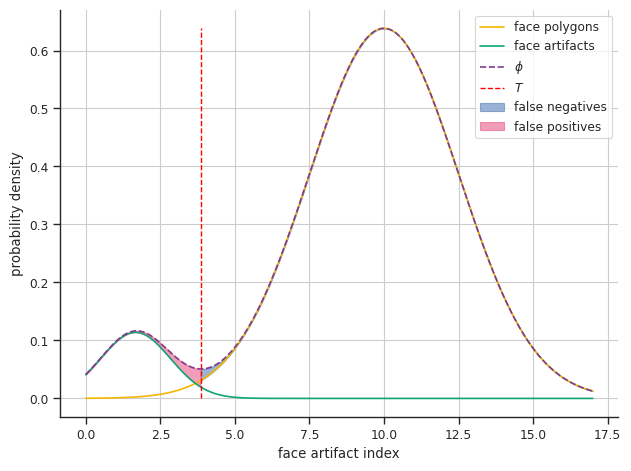

In [8]:
x = np.linspace(0, 17, 1000)

# First Gaussian distribution
mean1 = 10
std1 = 2.5
y1 = norm.pdf(x, mean1, std1) * 4

# Second Gaussian distribution
mean2 = 10 / 6
std2 = 7 / 6
y2 = norm.pdf(x, mean2, std2) / 3

phi = y1 + y2

peaks, d_peaks = find_peaks(x=phi, width=1)
t_loc = d_peaks["right_bases"][0]
t = x[t_loc]

# Plot the two distributions
plt.plot(x, y1, label="face polygons", color=Bold_6.hex_colors[3])
plt.plot(x, y2, label="face artifacts", color=Bold_6.hex_colors[1])
plt.plot(x, phi, label="$\phi$", linestyle="dashed", color=Bold_6.hex_colors[0])

plt.vlines(
    x=t,
    ymin=0,
    ymax=np.max(y1),
    colors="red",
    linestyles="dashed",
    alpha=1,
    linewidth=1,
    zorder=3,
    label="$T$",
)
# Fill the overlapping area
plt.fill_between(
    x[t_loc:],
    y1[t_loc:],
    phi[t_loc:],
    color=Bold_6.hex_colors[2],
    alpha=0.5,
    label="false negatives",
)

plt.fill_between(
    x[:t_loc],
    y2[:t_loc],
    phi[:t_loc],
    color=Bold_6.hex_colors[4],
    alpha=0.5,
    label="false positives",
)
plt.xlabel("face artifact index")
plt.ylabel("probability density")

plt.legend()
plt.savefig("../plots/peaks/concept.png", dpi=400)